# Introduction to Programming with Python

# Unit 6: While Loop

We ended the previous unit with an excercise to draw three polygons. Let's start with defining a function that will draw one polygon with specified number of sides `n` and length of each side `x`. To do it, we need to repeat drawing a side of length `x` `n` times, turning by a certain angle in between. Since we need to turn 360 degrees after drawing all sides, each individual angle would be $360/n$.

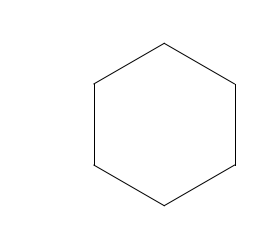

In [2]:
import jturtle as turtle

def poly(n,x):
    angle = 360/n
    for _ in range(n):
        turtle.forward(x)
        turtle.right(angle)

poly(6,100)
turtle.done()

Now, to draw three polygons with $n=3$, $5$ and $7$, we need a loop iterating over those numbers. This can either be accomplished by specifying all numbers in a list (like in the example below), or using clever `range` expression `range(3,8,2)`, or by looping `i` over numbers 0,1,2 with `range(3)`, and then calculating `n=3+2*i`.

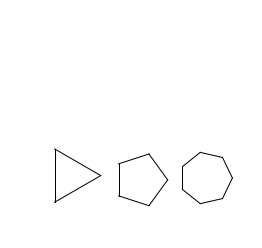

In [4]:
for i in [3,5,7]:
    poly(i,500/i)
    turtle.penup()
    turtle.right(90)
    turtle.forward(200)
    turtle.left(90)
    turtle.forward(20)
    turtle.pendown()
turtle.done()

Another trick that we do here is to decrease the size `x` as number of sides grows bigger. If we do not do it, each following $n$-gon will look  larger. You can experiment with the code above, putting constant size, or changing an expression on how it depends on $n$. 

By the way, we can create some nice graphics with `poly` function as well:

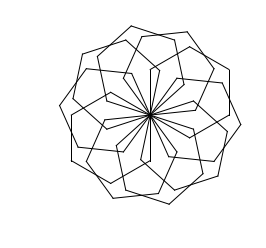

In [7]:
for i in range(10):
    poly(6,100)
    turtle.right(36)
turtle.done()

## While Loop

The loop we have learnt about so far is called `for`-loop, and it is useful when we know in advance how many times we need to repeat the process. However, there are some cases when this number is not known. Suppose we want to generate random quadratic equation that has solutions, using our function `random_equation` defined previously. In this case we probably need to generate random coefficients, and if the equation does not have solutions - repeat this process again. This can be achieved using another loop: **while** loop.

While loop looks like this:

```python
while condition:
    action
```

The code is executed in the following way:
1. `condition` is checked. If it is `False` - loop ends, execution continues from the code following the loop
2. If `condition` was `True` - action is executed
3. Evething repeats from step 1

It is worth noticing that `condition` should probably change inside the loop, i.e. some variables that are used within condition should change. In our case, we will generate new equation coefficients inside the loop, and check if it has solutions in the loop condition.

So, the code to generate "good" equation can look like this:

In [8]:
from pycourse import random_equation,solve

def random_good_equation():
    a,b,c = random_equation()
    while solve(a,b,c)!=None:
        a,b,c = random_equation()
    return a,b,c

print(random_good_equation())

(3, 0, 10)


In fact, there is more than one way to write `while`-loop in our case. The solution above has one small drawback - we need to write a call to `random_equation` twice. This can be avoided by using a variable that will contain the flag (`True`/`False` value) to indicate if the solution has been found:

In [10]:
def random_good_equation():
    solution_found = False
    while not solution_found:
        a,b,c = random_equation()
        solution_found = (solve(a,b,c)!=None)
    return a,b,c

print(random_good_equation())

(-1, -10, 12)


Notice how variable `solution_found` contains a true/false value, and how we can assign the result of comparison `solve(a,b,c)!=None` directly to this variable. Such true/false values are called **boolean values**, and it is one more type of values that Python can operate on (in addition to integers, floating point numbers and strings).

Yet one more way to think about this task is to write a condition when the loop should end. This can be accomplished by using `break` keyword, which is used to leave the loop. In this case we will write the loop as an **endless loop**, and then specify the exit condition:

In [11]:
def random_good_equation():
    while True:
        a,b,c = random_equation()
        if solve(a,b,c)!=None:
            break
    return a,b,c

print(random_good_equation())

(-1, -7, -4)


## Some Numerology

Let us consider one more example of using while loops, related to [numerology](https://en.wikipedia.org/wiki/Numerology) - a set of beliefs that numbers have some magical influence on our lives. Not implying that those beliefs are true, we will write a function that will help numerologists in one of their frequently used tasks: computing the number corresponding to some date. In order to do this, they often add up all individual digits of a number, until they get a single-digit number.

First, let us write a function that adds up all digits in a number. Note, that given a number $n$ (say, 123) we can compute its last (right-most) digit by dividing it by 10 and taking the remainder (123 % 10 = 3). Also, we can drop right-most digits by dividing the number by 10, and taking the whole part (this operation, **integer division**, is denoted in Python by `//`, so 123//10 = 12).

The function to add all digits will be implemented using while-loop, because we will add up all digits while there is still something to add. At some point, when dividing a number by 10, we will get 0 - and it will indicate the end of the loop:

In [12]:
def sum_digits(x):
    acc = 0
    while x>0:
        acc += x%10
        x = x//10
    return acc

sum_digits(12345)

15

However, numberologist will not stop at that, and to get the "final" number when would apply the same technique to the result, until it gets to one-digit number. We would need another while-loop to do that:

In [13]:
def magic_number(x):
    while x>10:
        x = sum_digits(x)
    return x

magic_number(12345)

6

Now we can compute the magic number corresponding to the current date. To do that, we will use `datetime` library:

In [19]:
import datetime
now = datetime.datetime.now()

number_date = now.day*1000000+now.month*10000+now.year
print(number_date, '->', magic_number(number_date))

20022020 -> 8


When we have a loop inside another loop, we call it **nested loops**. Two important things are worth noticing here:

* We need to use different names to name counter variables in nested loops. In our case, we use `i` as the counter of **outer loop**, and `j` as counter of **inner loop**.
* The counter of outer loop can be used inside the range expression in the inner loop.

We also introduce another operation here, `*=`, which is very useful whenever we are dealing with an accumulator. The expression `acc *= j` in our program is equivalent to `acc = acc * j`, but it is shorter, and is still quite clear in terms of meaning.

## Drawing a Rectangular City

In the previous unit, we have learnt how to draw a streen of several houses. Now it's time to use the notion of nested loops to draw a rectangular city with a number of streets! What we need to keep in mind is that after drawing one street we need to move the turtle back to the beginning of a street, and down. We will also define the configuration of a city (number of rows and columns) in variables in our code - it is always a good idea to do so, to make code more customizable.

In [1]:
!pip install --quiet git+https://github.com/shwars/jturtle
import jturtle as turtle

You should consider upgrading via the 'pip install --upgrade pip' command.


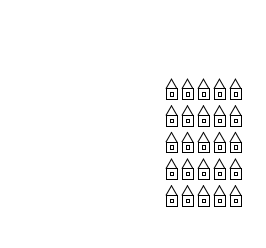

In [2]:
rows = 5 # number of rows (streets)
cols = 5 # number of columns (houses in a street)
sep = 5 # separation between houses
w = 10 # house size

from pycourse import house, square
        
for _ in range(rows):
    # draw one street
    for _ in range(cols):
        house(w) # draw a house
        # move turtle to the next house
        turtle.penup()
        turtle.right(90)
        turtle.forward(w+sep)
        turtle.left(90)
        turtle.pendown()
    # move turtle to the beginning of a street
    turtle.left(90)
    turtle.penup()
    turtle.forward(cols*(w+sep)) # width of the whole street
    turtle.right(90)
    turtle.backward(2*w+sep)
    turtle.pendown()
        
turtle.done()

Please note that we are using comments `#` quite extensively, to help you understand what goes on inside the code. Comments help other people as well as yourself after few weeks to understand the code.

Another useful trick that we are using here is called **anonymous variable** `_`. If we do not care about the value of a loop counter, we can use underscore instead of a variable name, which means *we do not care about the value*. It help people who read the code to understant that variable value is not important, and also saves you the effort of having to come up with new loop counter name each time inside nested loops.

## Nested Loops vs. One Loop

It is possible to rewrite the same logic using one big loop instead of two nested loops. In our case, whenever we encounter a street end, we need to return the turtle to the beginning of the street and move it down. Suppose the variable `i` denotes the loop counter, i.e. house number, in which case the end of the street is encountered when this number is divisible by `cols`, i.e. the remainder of `i` divided by `cols` is 0. 

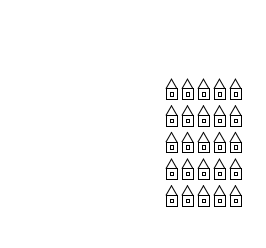

In [25]:
for i in range(1,rows*cols+1):
    house(w) # draw a house
    # move turtle to the next house
    turtle.penup()
    turtle.right(90)
    turtle.forward(w+sep)
    turtle.left(90)
    turtle.pendown()
    if i%cols == 0: # end-of-street encountered
        # move turtle to the beginning of a street
        turtle.left(90)
        turtle.penup()
        turtle.forward(cols*(w+sep)) # width of the whole street
        turtle.right(90)
        turtle.backward(2*w+sep)
        turtle.pendown()
        
turtle.done()

This example shows us that it is always possible to write the same program in many different ways. And there are often different criteria to determine which way is better:

* **code clarity** - it is always better to have a clear and readable code, because it is easier to write and maintain
* **program efficiency** - sometimes simpler or shorter code does not mean better performance, so we need to take performance considerations into account

Ofter we end up having to compromise between simplicity and performance. 

## Sierpiński Triangle

Now that we know loops, let me show you a very beautiful example of how a simple computer program can generate infinite complexity and beauty. We will learn how to draw so-called [**Sierpiński Triangle**](https://en.wikipedia.org/wiki/Sierpiński_triangle) - a fractal structure that looks like this:

<img src="images/Sierpinski_triangle.png" width="30%"/>

([photo](https://commons.wikimedia.org/w/index.php?curid=8862246) from [Wikipedia](https://en.wikipedia.org/wiki/Sierpiński_triangle) by Beojan Stanislaus, CC BY-SA 3.0)

This figure is surprisingly easy to draw! We need to implement the following algorithm:

1. Select three vertices of a triangle, $(x_1,y_1)$, $(x_2,y_2)$ and $(x_3,y_3)$.
2. Set coordinates of current point $(x,y)$ to some initial value.
3. Randomly pick one of the vertices $i\in\{1,2,3\}$
4. Calculate new point coordinates as *midpoint* between current point and selected vertice: 
$$x \leftarrow \frac{x_i+x}{2}$$
$$y \leftarrow \frac{y_i+x}{2}$$
5. Draw a point at coordinates $(x,y)$
6. Repeat from step 3

This process sounds like a loop than never ends, or so-called **infinite loop**. In practice, we definitely want our program to stop at some point, so we just program sufficiently large for-loop.

To begin with, let's define the list of triangle vertices as a list of coordinate pairs. We have not discussed yet what lists are, but for now please consider it just a collection of pairs, from which we would be able to pick one pair using `random.choice` function which we have seen before:

In [16]:
vertices = [(0,00),(100,0),(50,100)]

Now let's program the main loop. Here we use coordinate-based graphics and `turtle.point` to draw the dot, and to make the dot smaller we specify additional parameter, `pointstyle`. Please note that this loop can take a moment to execute!

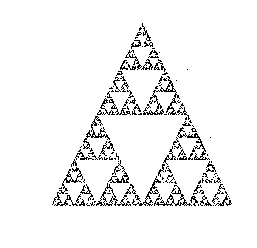

In [17]:
import random

x,y = 150,150
for _ in range(3000):
    vx, vy = random.choice(vertices)
    x = (x+vx)/2
    y = (y+vy)/2
    turtle.point((x,y),pointstyle=',')
turtle.done()

Isn't this picture beautiful?! I find it very fascinating that we can achieve potentially infinite complexity with quite a short code.

While the figure is beautiful, our code can still be improved. In our code we think in terms of individual coordinates $x$ and $y$, while we can switch to higher level thinking, and keep in mind the points, and not coordinates. 

To do that, let's first define a function `midpoint` to calculate the position of middle point between points `a` and `b`. Let me remind you that if `a` denotes a pair of point coordinates, then `a[0]` denotes the first coordinate ($x$), and `a[1]` -- second coordinate ($y$).

Using this function, the code becomes a lot cleaner:

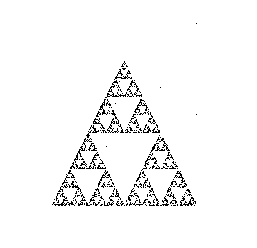

In [19]:
def midpoint(a,b):
    return ((a[0]+b[0])/2,(a[1]+b[1])/2)

p = 150,150
for _ in range(3000):
    v = random.choice(vertices)
    p = midpoint(p,v)
    turtle.point(p, pointstyle=',')
turtle.done()

## Exercise: Polygons

Coming back to our original topic of nested loops, please do the following exercise:
1. Define a function `poly` that will draw a polygon with a given number of sides (and a given size). You most probably want to use turtle graphics for this!
2. Draw three polygons with number of sides of 3 (triangle), 5 and 7. You should end up with a picture like this: